## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Morphology of Femoral Knee Cartilage](https://sbonaretti.github.io/pyKNEEr/morphology.html)
Content under Creative Commons Attribution license CC-BY-NC 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Morphology quantifications of femoral cartilage are:  

- *Thickness*, computed in two steps:  
  - Separation of subcondral surface and articular surface of the cartilage
  - Calculation of the distance between the two surfaces using a nearest neighbor method [1]

- *Volume*, calculated as the volume of the cartilage mask multiplied by the image resolution

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI2/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI2_segmented.zip" 
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_morphology_OAI2_FU.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io        as io
from pykneer import morphology_for_nb as morph
%matplotlib inline

## Image information

Inputs:   
- `input_file_name` contains the list of femoral cartilage masks
- `thickness_algo` is the algorithm used to calculate cartilage thickness
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)
- `output_file_name_thickness` contains the table with average and standard deviation of thickness
- `output_file_name_volume` contains the table with average volumes

In [3]:
# input_file_name            = "./image_list_morphology_OAI2_FU.txt" # commented out because downloaded from GitHub
thickness_algo             = 1 # 1 for nearest neighbor on bone-cartilage surface 
                               # 2 for nearest neighbor on articular surface
n_of_cores                 = 10
output_file_name_thickness = "thickness_OAI2_FU.csv"
output_file_name_volume    = "volume_OAI2_FU.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_morphology(input_file_name)

-> image information loaded


---

## Cartilage Thickness

### Separating subcondral surface and articular surface of cartilage

To calculate cartilage thickness, first the cartilage surface is extracted from the binary mask. Then subcondral surface and articular surface are divided in two separate point clouds

In [5]:
morph.separate_cartilage_surfaces(image_data, n_of_cores)

004_FU_prep_fc.mha
001_FU_prep_fc.mha
007_FU_prep_fc.mha
010_FU_prep_fc.mha
016_FU_prep_fc.mha
022_FU_prep_fc.mha
028_FU_prep_fc.mha
019_FU_prep_fc.mha
025_FU_prep_fc.mha
013_FU_prep_fc.mha
011_FU_prep_fc.mha
023_FU_prep_fc.mha
017_FU_prep_fc.mha
026_FU_prep_fc.mha
029_FU_prep_fc.mha
005_FU_prep_fc.mha
008_FU_prep_fc.mha
020_FU_prep_fc.mha
002_FU_prep_fc.mha
014_FU_prep_fc.mha
024_FU_prep_fc.mha
012_FU_prep_fc.mha
030_FU_prep_fc.mha
031_FU_prep_fc.mha
009_FU_prep_fc.mha
018_FU_prep_fc.mha
027_FU_prep_fc.mha
021_FU_prep_fc.mha
003_FU_prep_fc.mha
015_FU_prep_fc.mha
006_FU_prep_fc.mha
034_FU_prep_fc.mha
037_FU_prep_fc.mha
040_FU_prep_fc.mha
043_FU_prep_fc.mha
032_FU_prep_fc.mha
046_FU_prep_fc.mha
049_FU_prep_fc.mha
052_FU_prep_fc.mha
055_FU_prep_fc.mha
058_FU_prep_fc.mha
044_FU_prep_fc.mha
035_FU_prep_fc.mha
038_FU_prep_fc.mha
033_FU_prep_fc.mha
056_FU_prep_fc.mha
059_FU_prep_fc.mha
050_FU_prep_fc.mha
047_FU_prep_fc.mha
045_FU_prep_fc.mha
041_FU_prep_fc.mha
053_FU_prep_fc.mha
039_FU_prep_

#### Visual check 
Subcondral bone surface (yellow) and articular surface (blue) are visualized as flattened point clouds. The flattening is with respect to a cylinder interpolated into the cartilage surface [2]

001_FU_prep_fc.mha
002_FU_prep_fc.mha
003_FU_prep_fc.mha
004_FU_prep_fc.mha
005_FU_prep_fc.mha
006_FU_prep_fc.mha
007_FU_prep_fc.mha
008_FU_prep_fc.mha
009_FU_prep_fc.mha
010_FU_prep_fc.mha
011_FU_prep_fc.mha
012_FU_prep_fc.mha
013_FU_prep_fc.mha
014_FU_prep_fc.mha
015_FU_prep_fc.mha
016_FU_prep_fc.mha
017_FU_prep_fc.mha
018_FU_prep_fc.mha
019_FU_prep_fc.mha
020_FU_prep_fc.mha
021_FU_prep_fc.mha
022_FU_prep_fc.mha
023_FU_prep_fc.mha
024_FU_prep_fc.mha
025_FU_prep_fc.mha
026_FU_prep_fc.mha
027_FU_prep_fc.mha
028_FU_prep_fc.mha
029_FU_prep_fc.mha
030_FU_prep_fc.mha
031_FU_prep_fc.mha
032_FU_prep_fc.mha
033_FU_prep_fc.mha
034_FU_prep_fc.mha
035_FU_prep_fc.mha
036_FU_prep_fc.mha
037_FU_prep_fc.mha
038_FU_prep_fc.mha
039_FU_prep_fc.mha
040_FU_prep_fc.mha
041_FU_prep_fc.mha
042_FU_prep_fc.mha
043_FU_prep_fc.mha
044_FU_prep_fc.mha
045_FU_prep_fc.mha
046_FU_prep_fc.mha
047_FU_prep_fc.mha
048_FU_prep_fc.mha
049_FU_prep_fc.mha
050_FU_prep_fc.mha
051_FU_prep_fc.mha
052_FU_prep_fc.mha
053_FU_prep_

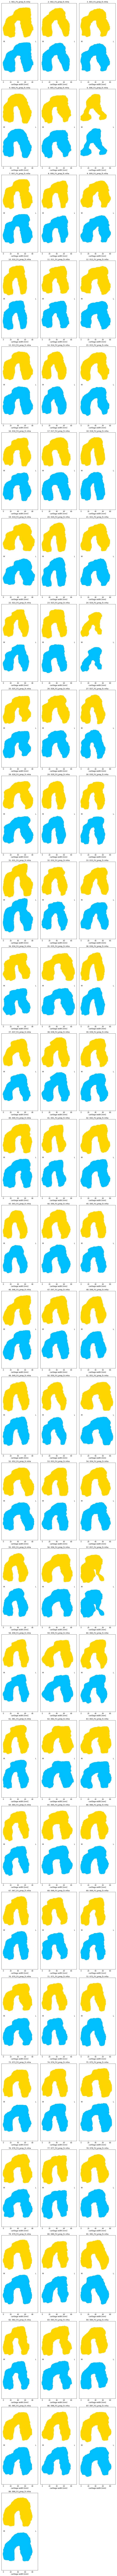

In [6]:
morph.show_cartilage_surfaces(image_data)

### Calculating cartilage thickness

Assign the chosen algorithm 

In [7]:
morph.algorithm(image_data, thickness_algo)

Calculate thickness

In [8]:
morph.calculate_thickness(image_data, n_of_cores)

001_FU_prep_fc.mha
007_FU_prep_fc.mha
004_FU_prep_fc.mha
016_FU_prep_fc.mha
019_FU_prep_fc.mha
025_FU_prep_fc.mha
010_FU_prep_fc.mha
013_FU_prep_fc.mha
028_FU_prep_fc.mha
022_FU_prep_fc.mha
011_FU_prep_fc.mha
023_FU_prep_fc.mha
017_FU_prep_fc.mha
026_FU_prep_fc.mha
005_FU_prep_fc.mha
024_FU_prep_fc.mha
029_FU_prep_fc.mha
008_FU_prep_fc.mha
002_FU_prep_fc.mha
012_FU_prep_fc.mha
020_FU_prep_fc.mha
014_FU_prep_fc.mha
031_FU_prep_fc.mha
030_FU_prep_fc.mha
009_FU_prep_fc.mha
018_FU_prep_fc.mha
027_FU_prep_fc.mha
015_FU_prep_fc.mha
021_FU_prep_fc.mha
003_FU_prep_fc.mha
006_FU_prep_fc.mha
034_FU_prep_fc.mha
032_FU_prep_fc.mha
037_FU_prep_fc.mha
040_FU_prep_fc.mha
043_FU_prep_fc.mha
046_FU_prep_fc.mha
049_FU_prep_fc.mha
044_FU_prep_fc.mha
052_FU_prep_fc.mha
038_FU_prep_fc.mha
033_FU_prep_fc.mha
055_FU_prep_fc.mha
058_FU_prep_fc.mha
035_FU_prep_fc.mha
059_FU_prep_fc.mha
050_FU_prep_fc.mha
045_FU_prep_fc.mha
056_FU_prep_fc.mha
061_FU_prep_fc.mha
047_FU_prep_fc.mha
041_FU_prep_fc.mha
039_FU_prep_

### Visualizing cartilage thickness

#### MAP: Thickness is represented as a colormap on the flattened cartilage [2]

001_FU_prep_fc.mha
002_FU_prep_fc.mha
003_FU_prep_fc.mha
004_FU_prep_fc.mha
005_FU_prep_fc.mha
006_FU_prep_fc.mha
007_FU_prep_fc.mha
008_FU_prep_fc.mha
009_FU_prep_fc.mha
010_FU_prep_fc.mha
011_FU_prep_fc.mha
012_FU_prep_fc.mha
013_FU_prep_fc.mha
014_FU_prep_fc.mha
015_FU_prep_fc.mha
016_FU_prep_fc.mha
017_FU_prep_fc.mha
018_FU_prep_fc.mha
019_FU_prep_fc.mha
020_FU_prep_fc.mha
021_FU_prep_fc.mha
022_FU_prep_fc.mha
023_FU_prep_fc.mha
024_FU_prep_fc.mha
025_FU_prep_fc.mha
026_FU_prep_fc.mha
027_FU_prep_fc.mha
028_FU_prep_fc.mha
029_FU_prep_fc.mha
030_FU_prep_fc.mha
031_FU_prep_fc.mha
032_FU_prep_fc.mha
033_FU_prep_fc.mha
034_FU_prep_fc.mha
035_FU_prep_fc.mha
036_FU_prep_fc.mha
037_FU_prep_fc.mha
038_FU_prep_fc.mha
039_FU_prep_fc.mha
040_FU_prep_fc.mha
041_FU_prep_fc.mha
042_FU_prep_fc.mha
043_FU_prep_fc.mha
044_FU_prep_fc.mha
045_FU_prep_fc.mha
046_FU_prep_fc.mha
047_FU_prep_fc.mha
048_FU_prep_fc.mha
049_FU_prep_fc.mha
050_FU_prep_fc.mha
051_FU_prep_fc.mha
052_FU_prep_fc.mha
053_FU_prep_

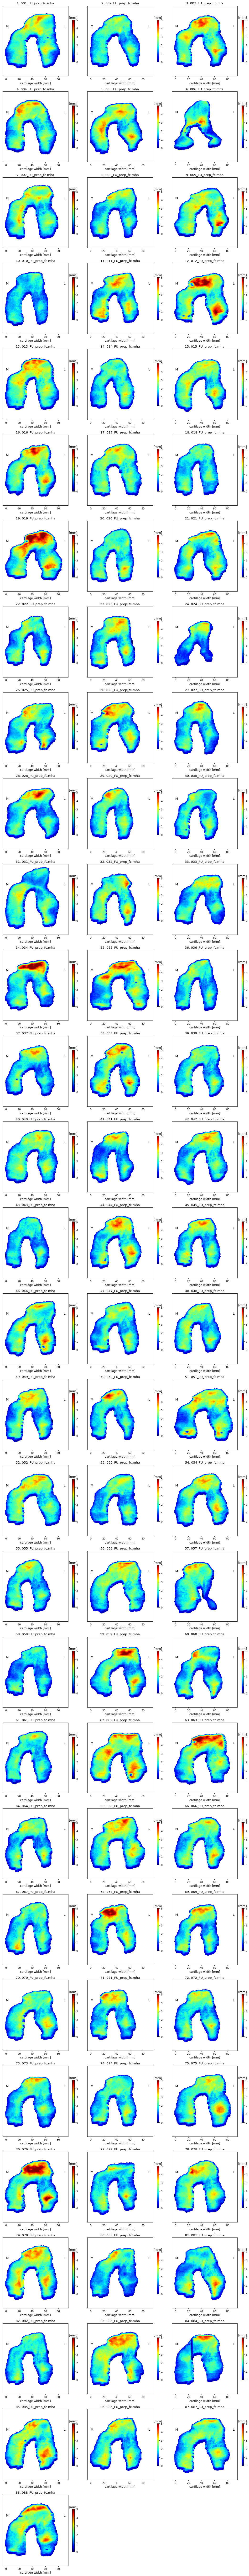

In [9]:
morph.show_thickness_maps(image_data)

#### GRAPH: Dots represent the average value of cartilage thickness per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

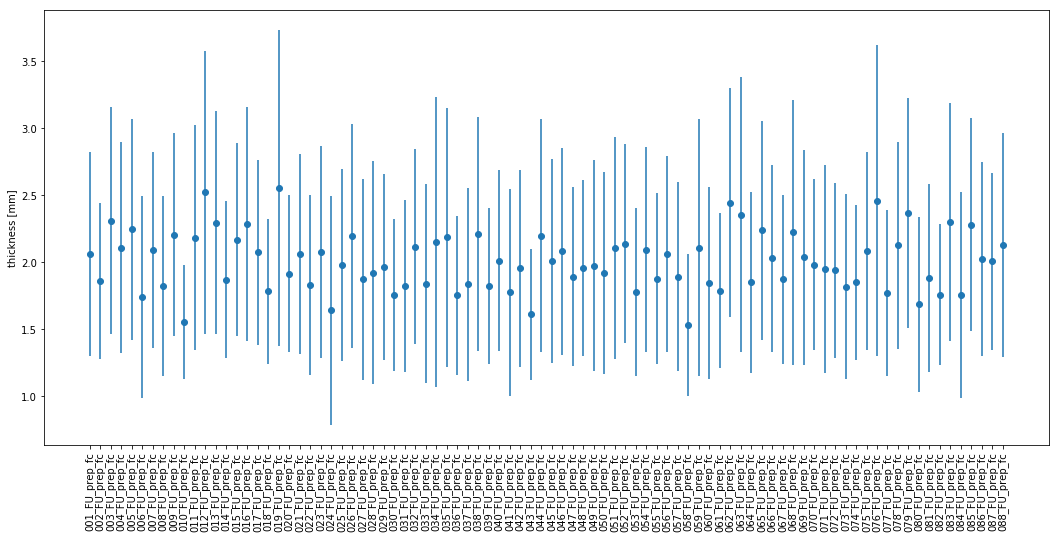

In [10]:
morph.show_thickness_graph(image_data)

#### TABLE: Average and standard deviation of cartilage thickness per image
The table is saved as a .csv file for subsequent analyisis

In [11]:
table = morph.show_thickness_table(image_data, output_file_name_thickness)
display(table)

Table saved as: thickness_OAI2_FU.csv


Subjects  averageThickness  std.dev
1   001_FU_prep_fc_thickness_1              2.06     0.76
2   002_FU_prep_fc_thickness_1              1.86     0.58
3   003_FU_prep_fc_thickness_1              2.31     0.85
4   004_FU_prep_fc_thickness_1              2.11     0.79
5   005_FU_prep_fc_thickness_1              2.25     0.83
6   006_FU_prep_fc_thickness_1              1.74     0.75
7   007_FU_prep_fc_thickness_1              2.09     0.73
8   008_FU_prep_fc_thickness_1              1.82     0.67
9   009_FU_prep_fc_thickness_1              2.21     0.76
10  010_FU_prep_fc_thickness_1              1.55     0.43
11  011_FU_prep_fc_thickness_1              2.18     0.84
12  012_FU_prep_fc_thickness_1              2.52     1.06
13  013_FU_prep_fc_thickness_1              2.30     0.83
14  014_FU_prep_fc_thickness_1              1.87     0.59
15  015_FU_prep_fc_thickness_1              2.17     0.72
16  016_FU_prep_fc_thickness_1              2.29     0.88
17  017_FU_prep_fc_thickness_1              2.07     0.69
18  018_FU_prep_fc_thickness_1              1.78     0.54
19  019_FU_prep_fc_thickness_1              2.55     1.18
20  020_FU_prep_fc_thickness_1              1.91     0.59
21  021_FU_prep_fc_thickness_1              2.06     0.75
22  022_FU_prep_fc_thickness_1              1.83     0.67
23  023_FU_prep_fc_thickness_1              2.08     0.79
24  024_FU_prep_fc_thickness_1              1.64     0.86
25  025_FU_prep_fc_thickness_1              1.98     0.72
26  026_FU_prep_fc_thickness_1              2.20     0.84
27  027_FU_prep_fc_thickness_1              1.87     0.75
28  028_FU_prep_fc_thickness_1              1.92     0.83
29  029_FU_prep_fc_thickness_1              1.97     0.69
30  030_FU_prep_fc_thickness_1              1.76     0.57
31  031_FU_prep_fc_thickness_1              1.82     0.64
32  032_FU_prep_fc_thickness_1              2.12     0.73
33  033_FU_prep_fc_thickness_1              1.84     0.74
34  034_FU_prep_fc_thickness_1              2.15     1.08
35  035_FU_prep_fc_thickness_1              2.19     0.97
36  036_FU_prep_fc_thickness_1              1.75     0.59
37  037_FU_prep_fc_thickness_1              1.83     0.72
38  038_FU_prep_fc_thickness_1              2.21     0.87
39  039_FU_prep_fc_thickness_1              1.82     0.58
40  040_FU_prep_fc_thickness_1              2.01     0.67
41  041_FU_prep_fc_thickness_1              1.77     0.77
42  042_FU_prep_fc_thickness_1              1.95     0.74
43  043_FU_prep_fc_thickness_1              1.61     0.49
44  044_FU_prep_fc_thickness_1              2.20     0.87
45  045_FU_prep_fc_thickness_1              2.01     0.76
46  046_FU_prep_fc_thickness_1              2.08     0.77
47  047_FU_prep_fc_thickness_1              1.89     0.67
48  048_FU_prep_fc_thickness_1              1.96     0.66
49  049_FU_prep_fc_thickness_1              1.97     0.79
50  050_FU_prep_fc_thickness_1              1.92     0.76
51  051_FU_prep_fc_thickness_1              2.11     0.83
52  052_FU_prep_fc_thickness_1              2.14     0.74
53  053_FU_prep_fc_thickness_1              1.77     0.63
54  054_FU_prep_fc_thickness_1              2.09     0.77
55  055_FU_prep_fc_thickness_1              1.88     0.64
56  056_FU_prep_fc_thickness_1              2.06     0.73
57  057_FU_prep_fc_thickness_1              1.89     0.71
58  058_FU_prep_fc_thickness_1              1.53     0.53
59  059_FU_prep_fc_thickness_1              2.11     0.96
60  060_FU_prep_fc_thickness_1              1.84     0.72
61  061_FU_prep_fc_thickness_1              1.79     0.58
62  062_FU_prep_fc_thickness_1              2.45     0.86
63  063_FU_prep_fc_thickness_1              2.36     1.02
64  064_FU_prep_fc_thickness_1              1.85     0.68
65  065_FU_prep_fc_thickness_1              2.24     0.82
66  066_FU_prep_fc_thickness_1              2.03     0.70
67  067_FU_prep_fc_thickness_1              1.87     0.63
68  068_FU_prep_fc_thickness_1              2.22     0.99
69  069_FU_prep_fc_t

---

## Cartilage Volume

Calculate cartilage volume

In [12]:
morph.calculate_volume(image_data)

001_FU_prep_fc.mha
002_FU_prep_fc.mha
003_FU_prep_fc.mha
004_FU_prep_fc.mha
005_FU_prep_fc.mha
006_FU_prep_fc.mha
007_FU_prep_fc.mha
008_FU_prep_fc.mha
009_FU_prep_fc.mha
010_FU_prep_fc.mha
011_FU_prep_fc.mha
012_FU_prep_fc.mha
013_FU_prep_fc.mha
014_FU_prep_fc.mha
015_FU_prep_fc.mha
016_FU_prep_fc.mha
017_FU_prep_fc.mha
018_FU_prep_fc.mha
019_FU_prep_fc.mha
020_FU_prep_fc.mha
021_FU_prep_fc.mha
022_FU_prep_fc.mha
023_FU_prep_fc.mha
024_FU_prep_fc.mha
025_FU_prep_fc.mha
026_FU_prep_fc.mha
027_FU_prep_fc.mha
028_FU_prep_fc.mha
029_FU_prep_fc.mha
030_FU_prep_fc.mha
031_FU_prep_fc.mha
032_FU_prep_fc.mha
033_FU_prep_fc.mha
034_FU_prep_fc.mha
035_FU_prep_fc.mha
036_FU_prep_fc.mha
037_FU_prep_fc.mha
038_FU_prep_fc.mha
039_FU_prep_fc.mha
040_FU_prep_fc.mha
041_FU_prep_fc.mha
042_FU_prep_fc.mha
043_FU_prep_fc.mha
044_FU_prep_fc.mha
045_FU_prep_fc.mha
046_FU_prep_fc.mha
047_FU_prep_fc.mha
048_FU_prep_fc.mha
049_FU_prep_fc.mha
050_FU_prep_fc.mha
051_FU_prep_fc.mha
052_FU_prep_fc.mha
053_FU_prep_

### Visualizing cartilage volume

#### GRAPH: Dots represent cartilage volume per image

<Figure size 1296x576 with 0 Axes>

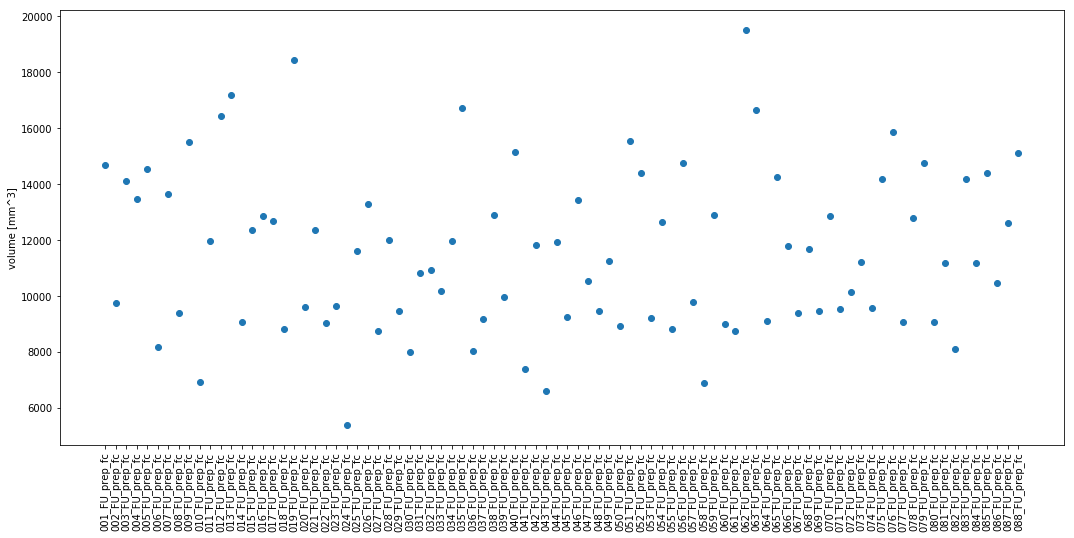

In [13]:
morph.show_volume_graph(image_data)

#### TABLE: Cartilage volume per image
The table is saved as a .csv file for subsequent analyisis

In [14]:
table = morph.show_volume_table(image_data, output_file_name_volume)
display(table)

Table saved as: volume_OAI2_FU.csv


Subjects  Volume
1   001_FU_prep_fc   14689
2   002_FU_prep_fc    9753
3   003_FU_prep_fc   14119
4   004_FU_prep_fc   13456
5   005_FU_prep_fc   14524
6   006_FU_prep_fc    8180
7   007_FU_prep_fc   13621
8   008_FU_prep_fc    9371
9   009_FU_prep_fc   15503
10  010_FU_prep_fc    6929
11  011_FU_prep_fc   11965
12  012_FU_prep_fc   16420
13  013_FU_prep_fc   17194
14  014_FU_prep_fc    9071
15  015_FU_prep_fc   12357
16  016_FU_prep_fc   12854
17  017_FU_prep_fc   12661
18  018_FU_prep_fc    8804
19  019_FU_prep_fc   18429
20  020_FU_prep_fc    9613
21  021_FU_prep_fc   12335
22  022_FU_prep_fc    9036
23  023_FU_prep_fc    9634
24  024_FU_prep_fc    5378
25  025_FU_prep_fc   11594
26  026_FU_prep_fc   13284
27  027_FU_prep_fc    8752
28  028_FU_prep_fc   12002
29  029_FU_prep_fc    9457
30  030_FU_prep_fc    7973
31  031_FU_prep_fc   10801
32  032_FU_prep_fc   10937
33  033_FU_prep_fc   10170
34  034_FU_prep_fc   11946
35  035_FU_prep_fc   16722
36  036_FU_prep_fc    8040
37  037_FU_prep_fc    9156
38  038_FU_prep_fc   12885
39  039_FU_prep_fc    9959
40  040_FU_prep_fc   15156
41  041_FU_prep_fc    7381
42  042_FU_prep_fc   11813
43  043_FU_prep_fc    6596
44  044_FU_prep_fc   11917
45  045_FU_prep_fc    9236
46  046_FU_prep_fc   13430
47  047_FU_prep_fc   10532
48  048_FU_prep_fc    9456
49  049_FU_prep_fc   11228
50  050_FU_prep_fc    8925
51  051_FU_prep_fc   15532
52  052_FU_prep_fc   14385
53  053_FU_prep_fc    9204
54  054_FU_prep_fc   12620
55  055_FU_prep_fc    8816
56  056_FU_prep_fc   14734
57  057_FU_prep_fc    9790
58  058_FU_prep_fc    6871
59  059_FU_prep_fc   12880
60  060_FU_prep_fc    8996
61  061_FU_prep_fc    8755
62  062_FU_prep_fc   19514
63  063_FU_prep_fc   16641
64  064_FU_prep_fc    9087
65  065_FU_prep_fc   14251
66  066_FU_prep_fc   11796
67  067_FU_prep_fc    9372
68  068_FU_prep_fc   11685
69  069_FU_prep_fc    9442
70  070_FU_prep_fc   12855
71  071_FU_prep_fc    9515
72  072_FU_prep_fc   10128
73  073_FU_prep_fc   11207
74  074_FU_prep_fc    9571
75  075_FU_prep_fc   14174
76  076_FU_prep_fc   15850
77  077_FU_prep_fc    9068
78  078_FU_prep_fc   12774
79  079_FU_prep_fc   14761
80  080_FU_prep_fc    9073
81  081_FU_prep_fc   11166
82  082_FU_prep_fc    8101
83  083_FU_prep_fc   14192
84  084_FU_prep_fc   11188
85  085_FU_prep_fc   14405
86  086_FU_prep_fc   10457
87  087_FU_prep_fc   12596
88  088_FU_prep_fc   15089

### References

[1] Maier J., Black M., Bonaretti S., Bier B., Eskofier B., Choi JH., Levenston M., Gold G., Fahrig R., Maier A. [*Comparison of Different Approaches for Measuring Tibial Cartilage Thickness.*](https://www.ncbi.nlm.nih.gov/pubmed/28753537) J Integr Bioinform. Jul 28;14(2). 2017.  
[2] Monu U.D., Jordan C.D., Samuelson B.L., Hargreaves B.A., Gold G.E., McWalter E.J. [*Cluster analysis of quantitative MRI $T_{2}$ and $T_{1\rho}$ relaxation times of cartilage identifies differences between healthy and ACL-injured individuals at 3T.*](https://www.ncbi.nlm.nih.gov/pubmed/27720806) Osteoarthritis Cartilage. Apr;25(4):513-520. 2017.   

### Dependencies

In [15]:
%load_ext watermark
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,skimage,scipy,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
matplotlib 2.2.2
numpy 1.14.5
pandas 0.23.4
skimage 0.14.1
scipy 1.1.0
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-957.1.3.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
